In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\plane\Home\Desktop\ML_Project\week5\heights.csv")
df.head()

,mother height,daughter height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70


In [3]:
b0=0
b1=0
lr=0.01
errors=[]
for i in range(4):
    for j in range(len(df)):

        pred=b0+(b1*df['mother height'][j])

        error=pred-df['daughter height'][j]
        errors.append(error)

        b0=b0-(lr*error)
        b1=b1-(lr*error*df['mother height'][j])

print(b0)
print(b1)


-2.5014913179278848e+36
-1.7526393083296448e+38


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model=LinearRegression()

X=df[['mother height']]
y=df['daughter height']

model.fit(X,y)

print(model.intercept_)
print(model.coef_)

-13.249581239530976
[1.20603015]


In [6]:
df['sk_lr_pred']=model.predict(X)

In [7]:
df['lr_pred']=b0+(b1*df['mother height'])

mse=np.sum((df['lr_pred']-df['daughter height'])**2)/len(df)
print(mse)
rmse=mse**0.5
print(rmse)

1.244255028069739e+80
1.115461800363302e+40


In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df['daughter height'],df['sk_lr_pred'])

6.101619207146855

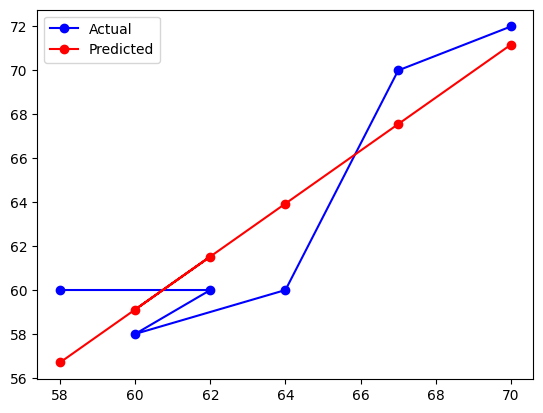

In [9]:
plt.plot(df['mother height'],df['daughter height'],color='blue',label='Actual',marker='o')
plt.plot(df['mother height'],df['sk_lr_pred'],color='red',label='Predicted',marker='o')
plt.legend()

Text(0, 0.5, 'Error')

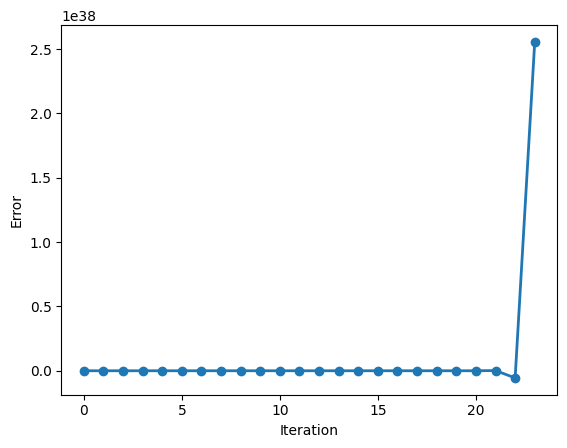

In [10]:
iteration=range(24)
plt.plot(iteration,errors,lw=2,marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error')

Q2

In [11]:
df=pd.DataFrame({'hrs':[1,2,3,4,5,6,7,8],
'pass':[0,0,0,0,1,1,1,1]})

df.head()

,hrs,pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [13]:
b0=0
b1=0
lr=0.01
n=len(df)

log_losses=[]

for i in range(3):
    b0_sum=0
    b1_sum=0
    log_loss_sum=0
    for j in range(n):

        y_pred=sigmoid(b0+(b1*df['hrs'][j]))

        error=y_pred-df['pass'][j]
        
        b0_sum+=error
        b1_sum+=error*df['hrs'][j]

        log_loss_sum+=(y_pred*np.log(y_pred))+((1-y_pred)*np.log(1-y_pred))

    b0=b0-((lr/n)*b0_sum)
    b1=b1-((lr/n)*b1_sum)

    log_loss=log_loss_sum/n
    log_losses.append(log_loss)


print(b0)
print(b1)




-0.00032977189636594064
0.02813127053730992


Text(0, 0.5, 'log_loss')

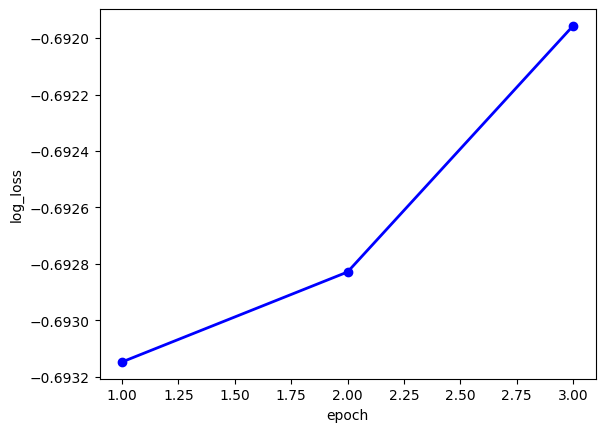

In [14]:
plt.plot([1,2,3],log_losses,lw=2,marker='o',color='blue')
plt.xlabel('epoch')
plt.ylabel('log_loss')

In [15]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()

X=df[['hrs']]
y=df['pass']

model1.fit(X,y)

print(model1.intercept_)
print(model1.coef_)

[-5.26410791]
[[1.16979937]]


In [16]:
df['sk_preds']=model1.predict(X)
df['sk_preds']

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
Name: sk_preds, dtype: int64

In [17]:
df['manual_pred_probs']=sigmoid(b0+(b1*df['hrs']))
labels=[]
for i in df['manual_pred_probs']:
    if i>=0.5:
        labels.append(1)
    else:
        labels.append(0)

df['manual_preds']=labels

df[['manual_pred_probs','manual_preds']]


,manual_pred_probs,manual_preds
0,0.506950,1
1,0.513980,1
2,0.521004,1
3,0.528019,1
4,0.535024,1
5,0.542015,1
6,0.548990,1
7,0.555945,1


In [18]:
acc=sum(df['pass']==df['manual_preds'])/n
acc

0.5